# Dự đoán tuổi thọ

Thời lượng ước tính: **120** phút

## Tổng quan

Các tiến bộ trong y học, sự gia tăng của các cơ sở chăm sóc sức khỏe và tiêu chuẩn chăm sóc được cải thiện đều góp phần làm tăng tuổi thọ trung bình trong vài thập kỷ qua. Mặc dù điều này có vẻ là thành tựu to lớn đối với nhân loại, nhưng nó cũng dẫn đến việc ngày càng nhiều người cao tuổi bị đưa vào các cộng đồng sống được chăm sóc và trợ giúp của người cao tuổi. Đạo đức, lợi ích và bất lợi của việc gửi cha mẹ vào trong những cơ sở như vậy vẫn còn đang gây tranh cãi; tuy nhiên, thực tế này đã làm tăng gánh nặng tài chính cho cả khu vực tư nhân và chính phủ.

Trong Lab này, bạn sẽ sử dụng tập con là tập dữ liệu tuổi thọ, được cung cấp bởi trang Trung tâm Thống kê Y tế Quốc gia của Trung tâm Kiểm soát và Phòng ngừa Dịch bệnh. Trang lưu trữ nhiều tập dữ liệu mở về các chủ đề khác nhau, từ thương tích, nghèo đói, sức khỏe phụ nữ, giáo dục, bảo hiểm y tế và tất nhiên là các bệnh truyền nhiễm, .... Nhưng cái bạn sẽ sử dụng là tập dữ liệu "Tuổi thọ trung bình theo giới tính, chủng tộc", có số liệu thống kê từ những năm 1900 đến nay được thu thập ở Hoa Kỳ. Chúng tôi đã bao gồm một bản sao của tập dữ liệu dưới dạng **[life_expectancy.csv](https://drive.google.com/file/d/1efDU4iNsXdfDOwmTkLUkUsNxaI8v7--n/view?usp=sharing)**. Tập dữ liệu chỉ liệt kê tuổi thọ của người da trắng và da đen, bởi vì trong suốt phần lớn thời gian thu thập, đó là hai chủng tộc lớn đã chủ động ghi lại số liệu thống kê của họ ở Hoa Kỳ.

## Mục tiêu

*   Xây dựng mô hình Hồi Quy Tuyến Tính từ thư viện scikit-learn để ngoại suy mọi người sẽ sống được bao lâu trong tương lai. Khu vực tư nhân và các chính phủ phản ánh những tính toán này khi tính toán các khoản chi trả cho an sinh xã hội, thuế, cơ sở hạ tầng, ..

*   Trực quan hóa mô hình sau khi xây dựng.



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

### Một hàm hữu dụng

Phương pháp tiện lợi này sẽ giải quyết các quan sát kiểm tra của bạn, so sánh chúng với đường hồi quy và hiển thị hệ số R2

In [54]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()
    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

## 1. Chuẩn bị dữ liệu

Load dữ liệu ở đây vào biến `X`. Như thường lệ, hãy thực hiện .describe và in tập dữ liệu của bạn và so sánh với tập dữ liệu được tải trong tệp văn bản hoặc trong ứng dụng trang tính:

In [9]:
# .. your code here ..
X = pd.read_csv('life_expectancy.csv', delimiter="\t")

X.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000



Tạo mô hình hồi quy tuyến tính của bạn tại đây và lưu trữ nó trong biến `model`. Đừng huấn luyện thật hoặc làm bất cứ điều gì khác với nó:

In [7]:
# .. your code here ..
from sklearn import linear_model
model = linear_model.LinearRegression()


Cắt nhỏ dữ liệu của bạn theo cách thủ công (ví dụ: không sử dụng `train_test_split` mà thực sự tự lập chỉ mục. Đặt `X_train` thành các giá trị năm ÍT hơn 1986 và `y_train` là giá trị tuổi 'WhiteMale' tương ứng. Bạn cũng có thể muốn đọc ghi chú về cách slice (cắt) ở cuối tài liệu này trước khi tiếp tục:

In [55]:
# .. your code here ..
train = X[X['Year '] < 1986]
X_train = train[['Year ']]
y_train = train[['WhiteMale ']]

## 2. Huấn luyện mô hình
Huấn luyện mô hình sau đó truyền nó vào `drawLine` với training set và nhãn.

Coefficients:  [[0.28357122]]
Intercept:  [-490.25609057]


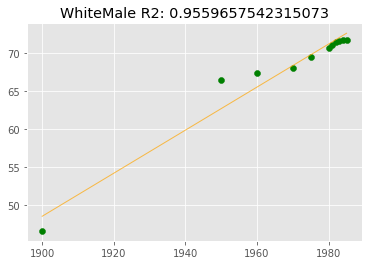

Est 2014 WhiteMale R2: 0.9559657542315073 Life Expectancy:  [80.85635426]
Est 2030 WhiteMale R2: 0.9559657542315073 Life Expectancy:  [85.39349384]
Est 2045 WhiteMale R2: 0.9559657542315073 Life Expectancy:  [89.6470622]


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
# .. your code here ..
model.fit(X_train, y_train)
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

drawLine(model, X_train, y_train, title = "WhiteMale")

## 3. Đánh giá Mô hình
Bạn có thể đặt tên cho mô hình là 'WhiteMale'. `drawLine` sẽ xuất ra console (bảng điều khiển) một phép ngoại suy/xấp xỉ năm 2014 cho những gì nó tin rằng tuổi thọ của đàn ông da trắng ở Hoa Kỳ sẽ là ... dựa trên dữ liệu trước năm 1986 mà bạn đã huấn luyện. Nó cũng sẽ tạo ra một phép ngoại suy năm 2030 và 2045:

In [38]:
# .. your code here ..
def calc_ave_age(year):
    print("Tuổi thọ trung bình của đàn ông da trắng ở Hoa Kỳ năm", year, ":", model.coef_[0][0]*year + model.intercept_[0])

calc_ave_age(2014)
calc_ave_age(2030)
calc_ave_age(2045)

Tuổi thọ trung bình của đàn ông da trắng ở Hoa Kỳ năm 2014 : 80.85635425623389
Tuổi thọ trung bình của đàn ông da trắng ở Hoa Kỳ năm 2030 : 85.39349383777596
Tuổi thọ trung bình của đàn ông da trắng ở Hoa Kỳ năm 2045 : 89.64706219547156


In tuổi thọ thực tế của 'WhiteMale' 2014 từ tập dữ liệu đã tải

In [48]:
# .. your code here ..
actual_age = np.array(X[X['Year '] == 2014]['WhiteMale '])
print("Tuổi thọ thực tế:", actual_age[0])

Tuổi thọ thực tế: 76.7


Lặp lại quá trình, nhưng thay vì cho WhiteMale, lần này chọn BlackFemale. Tạo một lát cho BlackFemales, fit mô hình, sau đó gọi `drawLine`. Cuối cùng, hãy in ra tuổi thọ thực tế của BlackFemale 2014:

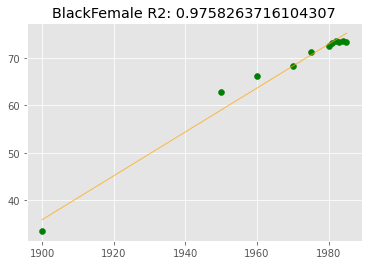

Est 2014 BlackFemale R2: 0.9758263716104307 Life Expectancy:  [88.6988994]
Est 2030 BlackFemale R2: 0.9758263716104307 Life Expectancy:  [96.11438808]
Est 2045 BlackFemale R2: 0.9758263716104307 Life Expectancy:  [103.06640871]


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
# .. your code here ..
train = X[X['Year '] < 1986]
X_train = train[['Year ']]
BF = train[['BlackFemale']]
model.fit(X_train, BF)
drawLine(model, X_train, BF, title="BlackFemale")

Cuối cùng, in ra một ma trận tương quan cho toàn bộ tập dữ liệu và hiển thị hình ảnh trực quan của ma trận tương quan, giống như chúng tôi đã mô tả trong phần trực quan của khóa học:

<AxesSubplot:>

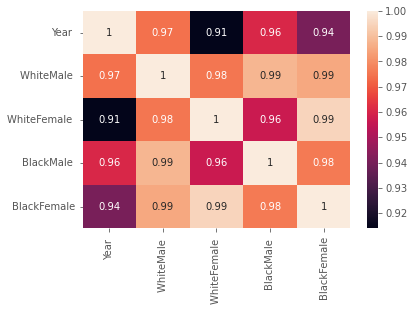

In [67]:
# .. your code here ..
correlation = X.corr()

import seaborn as sns

sns.heatmap(correlation, annot=True)


## Lưu ý về Fitting, Scoring, và Predicting:

Đây là một gợi ý để giúp bạn hoàn thành lab mà không cần vò đầu bứt tai! Khi sử dụng `.fit()`, `.score()`, và `.predict()` trên mô hình, SciKit-Learn mong muốn dữ liệu training ở dạng bảng tính (giống Mảng 2D). Điều này có nghĩa là bạn không thể chỉ truyền vào Mảng 1D (slice) là xong.

Để chuẩn bị dữ liệu hợp lý, bạn phải truyền vào Mảng Numpy 2D hoặc một khung dữ liệu. Nhưng điều gì sẽ xảy ra nếu bạn thực sự chỉ muốn truyền vào một đặc trưng duy nhất?

Nếu bạn slice khung dữ liệu của mình bằng cú pháp `df[['ColumnName']]`, kết quả trả về thực là _dataframe_. Hãy tiếp tục và thực hiện `type()` trên đó để kiểm tra. Vì nó đã là một khung dữ liệu nên bạn không cần thay đổi gì thêm.

Nhưng nếu bạn slice khung dữ liệu bằng cú pháp `df.ColumnName` HOẶC nếu bạn gọi `df ['ColumnName']`, kết quả trả về thực sự là một chuỗi (Mảng 1D)! Điều này sẽ khiến SKLearn gặp lỗi. Vì vậy, nếu bạn đang cắt bằng một trong hai kỹ thuật đó, trước khi gửi dữ liệu training hoặc testing tới `.fit` / `.score`, hãy thực hiện `any_column = my_column.reshape(-1,1)`.

Thao tác này sẽ chuyển đổi mảng 1D là `[n_samples]` thành mảng 2D có shape là `[n_samples, 1]`. Một đặc trung duy nhất với nhiều mẫu.

Nếu bạn đã làm điều gì đó như `my_column = [my_column]`, điều đó sẽ tạo ra một mảng có shape `[1, n_samples]`, điều này không chính xác vì SKLearn mong muốn dữ liệu của bạn được sắp xếp thành `[n_samples, n_features]`. Hãy nhớ rằng tất cả những điều trên chỉ liên quan đến `X` hoặc dữ liệu đầu vào và không áp dụng cho `y` hoặc nhãn.